## **Dataset**
Il dataset da utilizzare è CIFAR10: contiene 60,000 immagini (50,000 di training e 10,000 di test) divise in 10 classi, a risoluzione 32x32 pixel, a colori.
### **requisiti dell'homework**
- caricare correttamente il dataset CIFAR10;
- utilizzare i seguenti modelli di classificazione:
  1. regressione logistica
  2. k_NN
  3. SVM
  4. decision tree
- effettuare opportunatamente la model selection;
- riportare le prestazioni ottenute, secondo le metriche di valutazione appropriate.

In [1]:
 # Importazione delle librerie necessarie
 import numpy as np
 import matplotlib.pyplot as plt
 import pandas as pd
 from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.preprocessing import StandardScaler
 from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
!pip install tensorflow 

### **Caricamento del dataset**

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
  
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)

2025-05-05 13:39:34.476166: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746452374.727065      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746452374.800710      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training set shape: (50000, 32, 32, 3) (50000, 1)
Test set shape: (10000, 32, 32, 3) (10000, 1)


In [4]:
from sklearn.model_selection import train_test_split 
#lavoro considerando solo il 20% del dataset
x_train_small, x_train_rest, y_train_small, y_train_rest = train_test_split(
    x_train, y_train, test_size=0.8, random_state=42, stratify=y_train 
)
x_test_small, x_test_rest, y_test_small, y_test_rest = train_test_split(
    x_test, y_test, test_size=0.8, random_state=42, stratify=y_test 
)

In [6]:
#riformatto ogni immagine in un vettore unidimensionale
x_train_small = x_train_small.reshape(x_train_small.shape[0], -1)
x_test_small = x_test_small.reshape(x_test_small.shape[0], -1)
print("training set reshape:", x_train.shape, y_train.shape)
print("Test set reshape:", x_test_small.shape, y_test_small.shape)

training set reshape: (50000, 32, 32, 3) (50000, 1)
Test set reshape: (2000, 3072) (2000, 1)


### **PCA**
#### riduco la dimensione

In [7]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_small)
x_test_scaled = scaler.transform(x_test_small)

n_components=0.95 #mantengo il 95% della varianza
pca = PCA (n_components)
x_train_pca= pca.fit_transform(x_train_small) #applico PCA al training set
x_test_pca = pca.transform(x_test_small) #applico PCA al test set

print ("Forma iniziale dei dati: ", x_train.shape, x_test.shape)
print ("Forma del train dopo la PCA : ", x_train_pca.shape)
print ("Forma del test dopo la PCA : ", x_test_pca.shape)

Forma iniziale dei dati:  (50000, 32, 32, 3) (10000, 32, 32, 3)
Forma del train dopo la PCA :  (10000, 210)
Forma del test dopo la PCA :  (2000, 210)


In [8]:
import seaborn as sns

def plot_confusion_matrix(cm, title): 
    plt.figure(figsize=(8, 6)) 
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues") 
    plt.title(title) 
    plt.xlabel("Predetto") 
    plt.ylabel("Reale") 
    plt.show()

### **Regressione logistica**

(2000,)

Logistic Regression accuracy: 0.378
 Matrice di confusione per Regressione logistica:


 [[ 99   7   9   8   8   5   8   6  40  10]
 [ 13  85   4   7   3   7  14   7  20  40]
 [ 19   6  48  22  24  23  27  15  10   6]
 [  7  19  15  51  13  30  31  10  15   9]
 [ 10   5  31  17  59   8  30  25   9   6]
 [ 10  12  15  36  20  52  11  20  16   8]
 [  4   8  20  29  27   8  92   3   4   5]
 [ 15  10  20  17  20   7  12  71   3  25]
 [ 28  16   3   7   2   7   0   2 114  21]
 [ 18  41   2   5   2   5   9  11  22  85]]


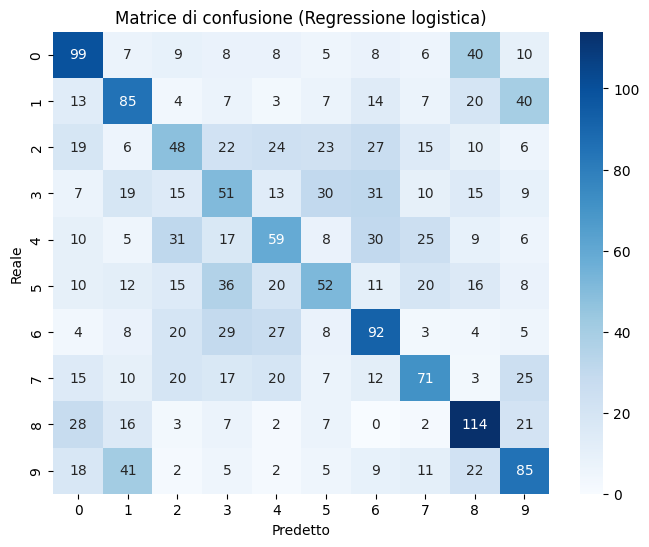

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Appiattiamo le etichette trasformandole da array bidimensionale (50000,1) ad array unidimensionale (50000,)
y_train_small = y_train_small.flatten()
y_test_small = y_test_small.flatten()

# Creo il modello di regressione logistica

log_reg = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', verbose=0)

# Addestramento del modello con i dati ridotti (attraverso PCA)
log_reg.fit(x_train_pca, y_train_small)

# Calcolo predizioni sul test set 
y_pred = log_reg.predict(x_test_pca)
print(y_pred.shape)

# Calcolo accuracy del modello
#serve per calcolare la percentuale di campioni correttamente classificati
accuracy_regression = accuracy_score(y_test_small, y_pred)
print("\nLogistic Regression accuracy:", accuracy_regression)


# Calcolo la matrice di confusione
cm_lr = confusion_matrix(y_test_small, y_pred)
print(" Matrice di confusione per Regressione logistica:")
print("\n\n",cm_lr)

plot_confusion_matrix(cm_lr, "Matrice di confusione (Regressione logistica)")

### **k-NN**


k-NN accuracy: 0.289
 Matrice di confusione per k-NN:


 [[100   1  21   2  11   4   2   2  56   1]
 [ 25  34  33  10  21   3  19   6  45   4]
 [ 31   2  68   6  54  12  22   1   4   0]
 [ 18   2  33  20  54  23  35   3  10   2]
 [ 23   2  56   7  79   5  17   2   9   0]
 [ 12   2  48  17  41  39  32   1   6   2]
 [ 10   3  47   4  59   9  62   1   5   0]
 [ 23   2  33  11  49  16  26  28   9   3]
 [ 30   5  16   5   6   4   4   3 125   2]
 [ 42  16  18   9  22   3   8   4  55  23]]


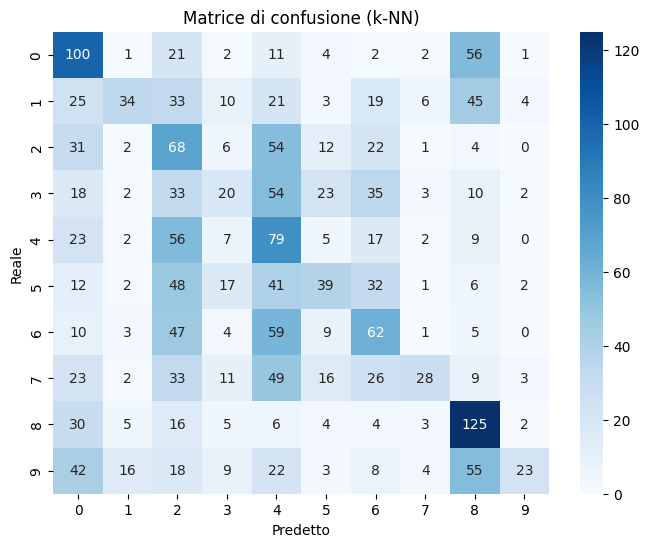

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform',metric='euclidean') 

# Addestro il modello
knn_model.fit(x_train_pca, y_train_small)

# Calcolo le predizioni
y_pred_knn = knn_model.predict(x_test_pca) 

# Accuratezza del modello k-NN
accuracy_knn = accuracy_score(y_test_small, y_pred_knn)
print("\nk-NN accuracy:", accuracy_knn)

# Calcolo la matrice di confusione
cm_knn = confusion_matrix(y_test_small, y_pred_knn)
print(" Matrice di confusione per k-NN:")
print("\n\n",cm_knn)

plot_confusion_matrix(cm_knn, "Matrice di confusione (k-NN)")

### **SVM**


Accuracy SVM:  0.4665
 Matrice di confusione per SVM:


 [[115   8  18   6   4   4   3   4  28  10]
 [ 14 113   3   7   1   9   6   5  11  31]
 [ 18   3  71  25  31  14  21  12   1   4]
 [  9  11  20  61   6  35  20  15   8  15]
 [ 11   4  32  20  77  12  18  17   5   4]
 [  7   7  11  41  16  77  19  14   3   5]
 [  3   3  25  14  34   8 103   5   4   1]
 [ 12   9  12  17  18  19   5  86   6  16]
 [ 21  10   4   6   0   5   2   2 130  20]
 [  8  41   4  12   2   5   4  10  14 100]]


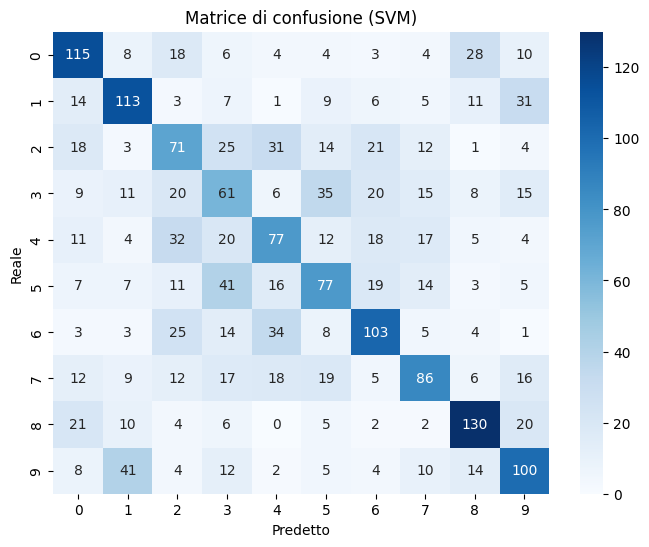

In [11]:
from sklearn.svm import SVC
model_svm= SVC(kernel="rbf", C=10)
model_svm.fit(x_train_pca, y_train_small) #addestro il modello sui dati ridotti
y_pred_svm= model_svm.predict(x_test_pca)
accuracy_svm= accuracy_score(y_test_small, y_pred_svm)
print("\nAccuracy SVM: ", accuracy_svm)


# Calcolo la matrice di confusione
cm_SVM = confusion_matrix(y_test_small, y_pred_svm)
print(" Matrice di confusione per SVM:")
print("\n\n",cm_SVM)

plot_confusion_matrix(cm_SVM, "Matrice di confusione (SVM)")

### **Decision tree**


Accuracy Decision Tree: 0.21
 Matrice di confusione per Decision Tree:


 [[59 12 21 14 13  8  7 13 42 11]
 [21 39  9 24 14 11 14 12 28 28]
 [22  5 40 24 32 16 22 21 10  8]
 [19 11 24 30 21 34 17 14 10 20]
 [16  9 38 15 42 12 27 25  7  9]
 [ 5 14 22 32 21 43 19 16 17 11]
 [ 9 17 19 27 29 23 38 23  8  7]
 [17 19 24 18 22 23 16 34 10 17]
 [28 23 18  6 11 13  4  9 61 27]
 [18 42 17 17 10  9  7 20 26 34]]


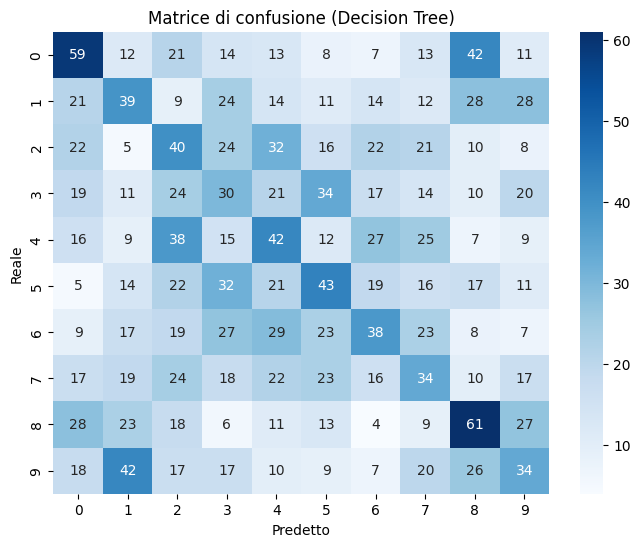

In [12]:
from sklearn.tree import DecisionTreeClassifier

model_tree= DecisionTreeClassifier(criterion='entropy', random_state=42)

# Addestro l’albero 
model_tree.fit(x_train_pca, y_train_small)

# Predizioni sul test set
y_pred_tree = model_tree.predict(x_test_pca)

# Calcolo accuratezza
accuracy_tree = accuracy_score(y_test_small, y_pred_tree)
print("\nAccuracy Decision Tree:", accuracy_tree)


# Calcolo la matrice di confusione
cm_decision_tree = confusion_matrix(y_test_small, y_pred_tree)
print(" Matrice di confusione per Decision Tree:")
print("\n\n",cm_decision_tree)

plot_confusion_matrix(cm_decision_tree, "Matrice di confusione (Decision Tree)")

### **Model Selection**

In [13]:
 # Creo un dizionario con le accuracy ottenute

model_accuracy= {
 "Logistic Regression": accuracy_regression,
 "k-NN": accuracy_knn,
 "SVM": accuracy_svm,
 "Decision Tree": accuracy_tree
 }
 

In [14]:
from sklearn.linear_model import LogisticRegression

# Definisco la griglia di iperparametri
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10],             
    'penalty': ['l2'],                   
    'solver': ['lbfgs', 'saga'],         
    'max_iter': [3000, 5000]                    
}

# Creo il modello base
logistic_regression = LogisticRegression(multi_class='multinomial', random_state=42)

# Faccio la Grid Search con cross-validation considerando 3 fold
grid_logistic = GridSearchCV(logistic_regression, param_grid_logistic, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_logistic.fit(x_train_pca, y_train_small.ravel())

# Miglior modello
print("\nMigliori parametri per Regressione Logistica:", grid_logistic.best_params_)

best_logistic = grid_logistic.best_estimator_ #estraggo il modello addestrato con iperparametri migliori


y_pred_best_logistic = best_logistic.predict(x_test_pca)
accuracy_best_logistic = accuracy_score(y_test_small, y_pred_best_logistic)
print("Accuracy della miglior Logistic Regression:", accuracy_best_logistic)


Fitting 3 folds for each of 16 candidates, totalling 48 fits

Migliori parametri per Regressione Logistica: {'C': 0.01, 'max_iter': 3000, 'penalty': 'l2', 'solver': 'saga'}
Accuracy della miglior Logistic Regression: 0.3765


In [15]:
# Definisco la griglia degli iperparametri
param_grid_knn = {
 'n_neighbors': [3, 5, 7],
 'weights': ['uniform', 'distance'],
 'metric': ['euclidean', 'manhattan']
 }

# Creo il modello base
knn = KNeighborsClassifier()

# Faccio la Grid Search con cross-validation considerando 3 fold
grid_knn = GridSearchCV(knn, param_grid_knn, cv=3, scoring='accuracy', verbose=1, n_jobs=1)

# Grid Search sul train
grid_knn.fit(x_train_pca, y_train_small)
print("\nMigliori parametri per k-NN:", grid_knn.best_params_)

best_knn = grid_knn.best_estimator_ #estraggo il modello addestrato con iperparametri migliori

y_pred_best_knn = best_knn.predict(x_test_pca)
accuracy_best_knn = accuracy_score(y_test_small, y_pred_best_knn)
print("Accuracy del miglior k-NN:", accuracy_best_knn)

Fitting 3 folds for each of 12 candidates, totalling 36 fits

Migliori parametri per k-NN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy del miglior k-NN: 0.3125


In [16]:
param_grid_svm = {
 'C': [0.1, 1, 10],
 'kernel': ['rbf']
}

svm = SVC()

grid_svm = GridSearchCV(svm, param_grid_svm, cv=3, scoring='accuracy', verbose=1, n_jobs=1)
grid_svm.fit(x_train_pca, y_train_small)

print("\nMigliori parametri per SVM:", grid_svm.best_params_)

best_svm = grid_svm.best_estimator_
y_pred_best_svm = best_svm.predict(x_test_pca)
accuracy_best_svm = accuracy_score(y_test_small, y_pred_best_svm)
print("Accuracy del miglior SVM:", accuracy_best_svm)

Fitting 3 folds for each of 3 candidates, totalling 9 fits

Migliori parametri per SVM: {'C': 10, 'kernel': 'rbf'}
Accuracy del miglior SVM: 0.4665


In [17]:
#definisco prf. max e num. min. di campioni richiesti per dividere un nodo
param_grid_tree = {
 'max_depth': [10, 20, None],
 'min_samples_split': [2, 5, 10],
 'criterion': ['gini', 'entropy']
}

tree = DecisionTreeClassifier(random_state=42)

grid_tree = GridSearchCV(tree, param_grid_tree, cv=3, scoring='accuracy', verbose=1, n_jobs =-1)
grid_tree.fit(x_train_pca, y_train_small)

print("\nMigliori parametri per Decision Tree:", grid_tree.best_params_)

best_tree = grid_tree.best_estimator_
y_pred_best_tree = best_tree.predict(x_test_pca)
accuracy_best_tree = accuracy_score(y_test_small, y_pred_best_tree)
print("Accuracy del miglior Decision Tree:", accuracy_best_tree)

Fitting 3 folds for each of 18 candidates, totalling 54 fits

Migliori parametri per Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}
Accuracy del miglior Decision Tree: 0.264


In [18]:
print("\nMigliori parametri per Regressione Logistica:", grid_logistic.best_params_)
print("\nMigliori parametri per k-NN:", grid_knn.best_params_)
print("\nMigliori parametri per SVM:", grid_svm.best_params_)
print("\nMigliori parametri per Decision Tree:", grid_tree.best_params_)



Migliori parametri per Regressione Logistica: {'C': 0.01, 'max_iter': 3000, 'penalty': 'l2', 'solver': 'saga'}

Migliori parametri per k-NN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}

Migliori parametri per SVM: {'C': 10, 'kernel': 'rbf'}

Migliori parametri per Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 10}


In [19]:
# Trovo il modello con la migliore accuratezza

best_model_name= max(model_accuracy, key= model_accuracy.get)
best_model_accuracy=model_accuracy[best_model_name]

print(f"\nIl modello migliore è: {best_model_name} con accuratezza = {best_model_accuracy: .4f}")


Il modello migliore è: SVM con accuratezza =  0.4665
